<a href="https://colab.research.google.com/github/Spartan-Arun/ML-POC/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# I'm Gonna Classify Images ;)

In [ ]:
import tensorflow as tf

from tensorflow import keras

from keras.models import Sequential

from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout

from tensorflow.keras import layers

from keras.utils import to_categorical

import numpy as np

import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [ ]:
from keras.datasets import cifar10

(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()

In [ ]:
print(type(X_train))
print(type(Y_train))
print(type(X_test))
print(type(Y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
index =10 

X_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

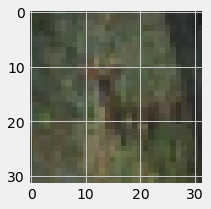

In [ ]:
plt.figure(figsize=(3,3))
img = plt.imshow(X_train[index])

In [ ]:
print('label',Y_train[index])

label [4]


In [ ]:
classification = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

print('img class',classification[Y_train[index][0]])

img class deer


In [ ]:
Y_train_one_hot = to_categorical(Y_train)

Y_test_one_hot = to_categorical(Y_test)

print(Y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
print('new label',Y_train_one_hot[index])

new label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
#normalize the pixels to values between 0 and 1

X_train = X_train/255

X_test = X_test/255

In [ ]:
print(X_train[index])

[[[0.20784314 0.25490196 0.20784314]
  [0.21176471 0.24705882 0.20392157]
  [0.21960784 0.23529412 0.19607843]
  ...
  [0.18431373 0.2        0.19607843]
  [0.16078431 0.17647059 0.17254902]
  [0.09411765 0.10980392 0.10588235]]

 [[0.18039216 0.23137255 0.16078431]
  [0.20784314 0.24313725 0.17647059]
  [0.21176471 0.23137255 0.17254902]
  ...
  [0.16470588 0.18039216 0.17647059]
  [0.15294118 0.16862745 0.16470588]
  [0.10980392 0.1254902  0.12156863]]

 [[0.17647059 0.23137255 0.14901961]
  [0.19607843 0.23529412 0.16078431]
  [0.18039216 0.20392157 0.13333333]
  ...
  [0.14901961 0.16470588 0.16078431]
  [0.14117647 0.15686275 0.15294118]
  [0.11372549 0.12941176 0.1254902 ]]

 ...

 [[0.27843137 0.3254902  0.25882353]
  [0.29019608 0.3254902  0.25882353]
  [0.31372549 0.33333333 0.2627451 ]
  ...
  [0.2        0.21176471 0.12941176]
  [0.18039216 0.19215686 0.13333333]
  [0.19215686 0.19607843 0.16078431]]

 [[0.29411765 0.32156863 0.2627451 ]
  [0.30980392 0.33333333 0.27058824]


In [ ]:
#model

model = Sequential()

#first layer

model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))

#second layer

model.add(MaxPool2D(pool_size=(2,2)))

#third layer

model.add(Conv2D(32,(5,5),activation='relu'))

#fourth layer

model.add(MaxPool2D(pool_size=(2,2)))

#fifth layer

model.add(Flatten())

#neurons
model.add(Dense(1000,activation='relu'))

#dropout
model.add(Dropout(0.5))

#neurons
model.add(Dense(500,activation='relu'))

#dropout
model.add(Dropout(0.5))

#neurons
model.add(Dense(250,activation='relu'))

#neurons
model.add(Dense(10,activation='softmax'))

In [ ]:
#compile model

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train,Y_train_one_hot,batch_size=256,epochs=10,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 66s 413ms/step - loss: 1.7399 - accuracy: 0.3514 - val_loss: 1.4302 - val_accuracy: 0.4794
Epoch 2/10
157/157 [==============================] - 63s 404ms/step - loss: 1.3721 - accuracy: 0.5004 - val_loss: 1.2495 - val_accuracy: 0.5487
Epoch 3/10
157/157 [==============================] - 64s 405ms/step - loss: 1.2479 - accuracy: 0.5533 - val_loss: 1.2006 - val_accuracy: 0.5757
Epoch 4/10
157/157 [==============================] - 66s 420ms/step - loss: 1.1374 - accuracy: 0.5918 - val_loss: 1.1439 - val_accuracy: 0.5974
Epoch 5/10
157/157 [==============================] - 63s 404ms/step - loss: 1.0599 - accuracy: 0.6227 - val_loss: 1.0163 - val_accuracy: 0.6445
Epoch 6/10
157/157 [==============================] - 65s 411ms/step - loss: 0.9775 - accuracy: 0.6563 - val_loss: 0.9752 - val_accuracy: 0.6552
Epoch 7/10
157/157 [==============================] - 65s 416ms/step - loss: 0.9107 - accuracy: 0.6770 - val_loss: 0.9478 - val_ac

In [ ]:
model.evaluate(X_test,Y_test_one_hot)[1]

313/313 [==============================] - 6s 20ms/step - loss: 0.8929 - accuracy: 0.6954


0.6953999996185303

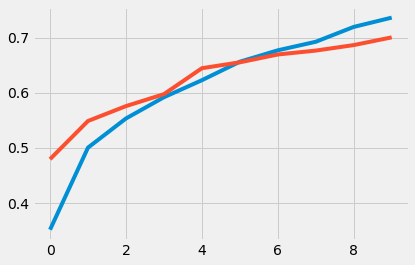

In [ ]:
plt.plot(hist.history['accuracy'])

plt.plot(hist.history['val_accuracy'])

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving dog2.jpg to dog2.jpg


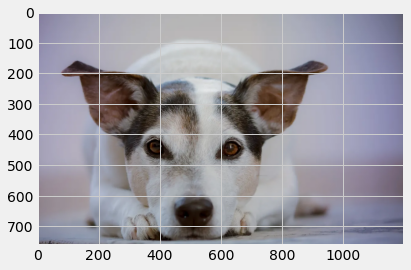

In [ ]:
new_img = plt.imread('dog2.jpg')

img = plt.imshow(new_img)

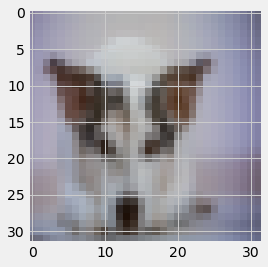

In [ ]:
from skimage.transform import resize

resized_img = resize(new_img, (32,32,3))

plt.imshow(resized_img)

In [ ]:
predictions = model.predict(np.array([resized_img]))

predictions

1/1 [==============================] - 0s 26ms/step


array([[1.81576572e-02, 1.66686295e-04, 2.48692915e-01, 2.46700913e-01,
        1.64238036e-01, 2.90402919e-01, 1.32239172e-02, 1.47911785e-02,
        3.33701470e-03, 2.88836134e-04]], dtype=float32)

In [ ]:
list_index = [0,1,2,3,4,5,6,7,8,9]

x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]]>x[0][list_index[j]]:
      temp = list_index[i]

      list_index[i] = list_index[j]

      list_index[j] = temp

list_index

[5, 2, 3, 4, 0, 7, 6, 8, 9, 1]

In [ ]:
#print labels of predictions

for i in range(5):
  print(classification[list_index[i]],':',predictions[0][list_index[i]]*100,'%')

dog : 29.040291905403137 %
bird : 24.869291484355927 %
cat : 24.67009127140045 %
deer : 16.423803567886353 %
airplane : 1.8157657235860825 %
